# Visualização com Graficos

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

notas = pd.read_csv("./Arquivos/ratings.csv")

## Histograma

<AxesSubplot:>

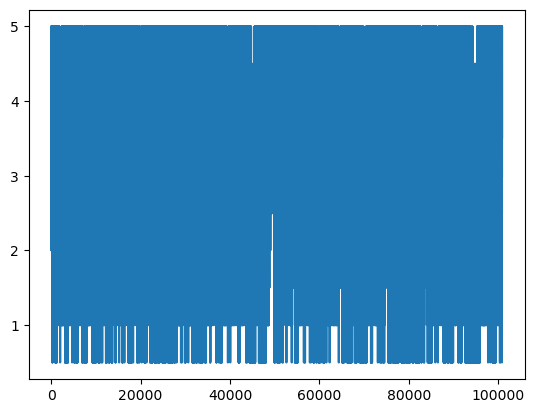

In [2]:
notas.rating.plot()              # Assim, representa todos os milhares de dados

### Representa os  dados agrupados

<AxesSubplot:ylabel='Frequency'>

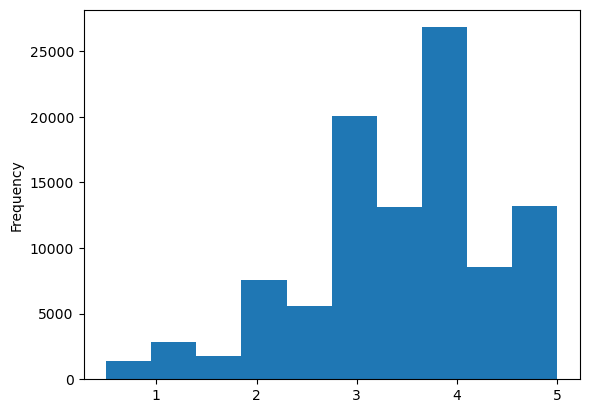

In [5]:
notas.rating.plot(kind="hist") 

## Boxplot com seaborn 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating'>

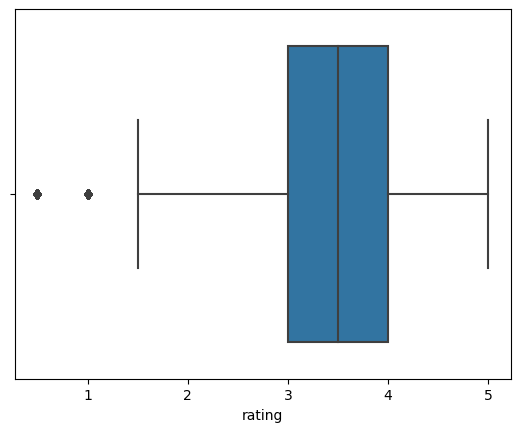

In [6]:
import seaborn as sns

sns.boxplot(notas.rating)

# Visualizando graficos por categoria

In [4]:
tmdb = pd.read_csv("./Arquivos/tmdb_5000_movies.csv")

### Criando dataset com contagem de idiomas 

In [5]:
contagem_idioma = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_idioma.columns = ["original_language", "total"]
contagem_idioma.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


# Representando com grafico de barras 

##### Informando o eixo X, eixo Y e o dataset

<AxesSubplot:xlabel='original_language', ylabel='total'>

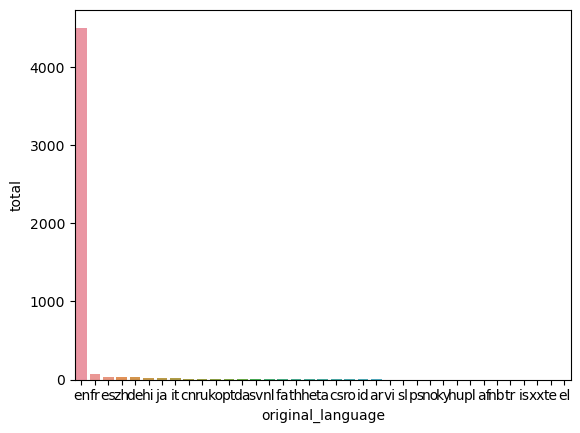

In [6]:
sns.barplot(x="original_language", y = "total", data = contagem_idioma)

## De maneira mais alto nivel
##### Mais simples, porem tendo menos controle
##### Não preciso criar um dataset com as original_languages, passo o dataSet geral

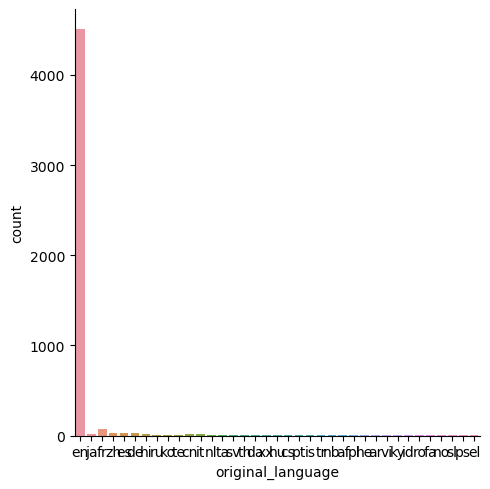

In [7]:
sns.catplot(x="original_language", kind="count", data= tmdb)

# Grafico de pizza  

([<matplotlib.patches.Wedge at 0x21195b9d6a0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

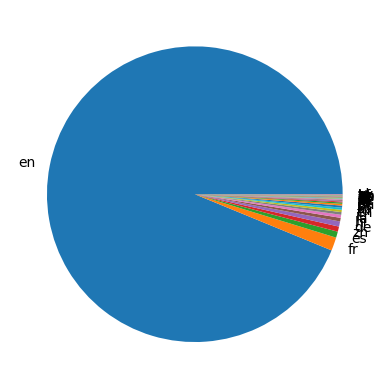

In [11]:
plt.pie(contagem_idioma["total"], labels = contagem_idioma["original_language"])

## Nenhum grafico esta conseguindo mostrar a informação de forma clara
#### Ha muito mais filmes em ingles  que em outras linguas, precisamos comparar o ingles com todas as outras linguas juntas.
#### Vamos fazer essa separação:

In [15]:
total_por_lingua = tmdb["original_language"].value_counts()   #Contagem por cada lingua
total_geral = total_por_lingua.sum()           # Soma de todas
total_ingles = total_por_lingua.loc["en"]      # Total de filmes ingles
total_resto = total_geral - total_ingles       # Todos os outros sem ingles
print(total_ingles, total_resto)

4505 298


## Vamos criar um dataframe para passar a informação correta 

In [21]:
dados = {                                         # Dicionario em python
    'lingua': ['ingles', 'outros'],
    'total': [total_ingles, total_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

### Vamos criar o dataframe 

In [23]:
novoData = pd.DataFrame(dados)

### Agora vamos plotar o grafico  

<AxesSubplot:xlabel='lingua', ylabel='total'>

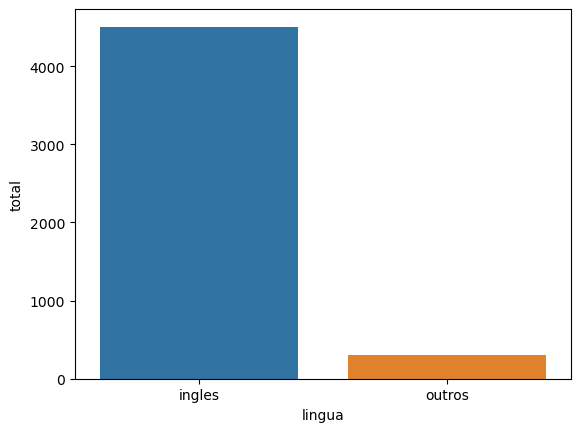

In [25]:
sns.barplot(x="lingua", y="total", data = novoData)

([<matplotlib.patches.Wedge at 0x2119cdb2fd0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

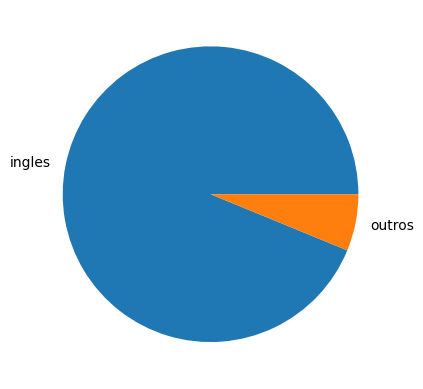

In [27]:
plt.pie(novoData["total"], labels = novoData["lingua"])

# Vamos passar as informações dos outro idiomas, excluindo o ingles

In [70]:
# Contagem de quantos itens ha em cada um dos idiomas (da categoria original_language)
total_diferentes_do_ingles = tmdb.query("original_language != 'en'").original_language.value_counts()  
total_diferentes_do_ingles

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

### Montar um dataFrame so com os filmes diferentes do ingles 

In [71]:
filmes_diferentes_do_ingles = tmdb.query("original_language != 'en'")

### Plotar o grafico 

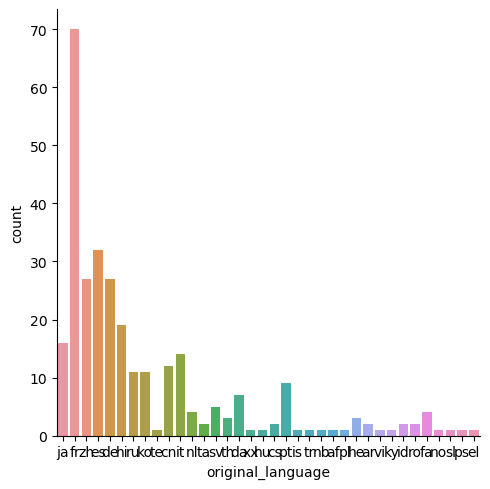

In [73]:
sns.catplot(x = "original_language", kind = "count", data = filmes_diferentes_do_ingles)

# Precisamos aumentar a largura do grafico para visualizar melhor 

### Faremos isso, atraves do atributo aspect

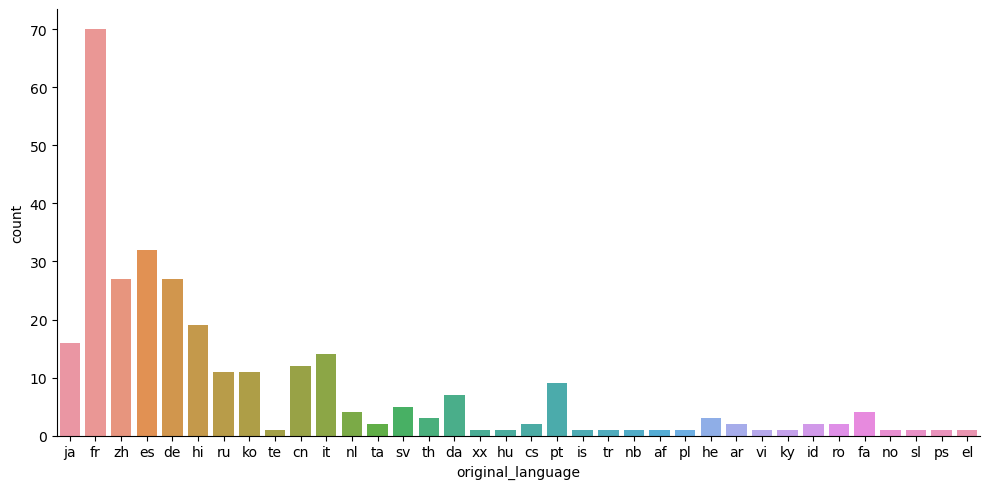

In [74]:
sns.catplot(x = "original_language", kind = "count", data = filmes_diferentes_do_ingles, aspect = 2)

## Não esta ordenado, esta como veio no dataSet, vamos ordenar com o atributo order:
### Porem, tem que definir a ordem um por um, mas ja temos essa ordem quando calculamos o value_counts, definiremos a ordem atraves do indice desse dado calculado antes

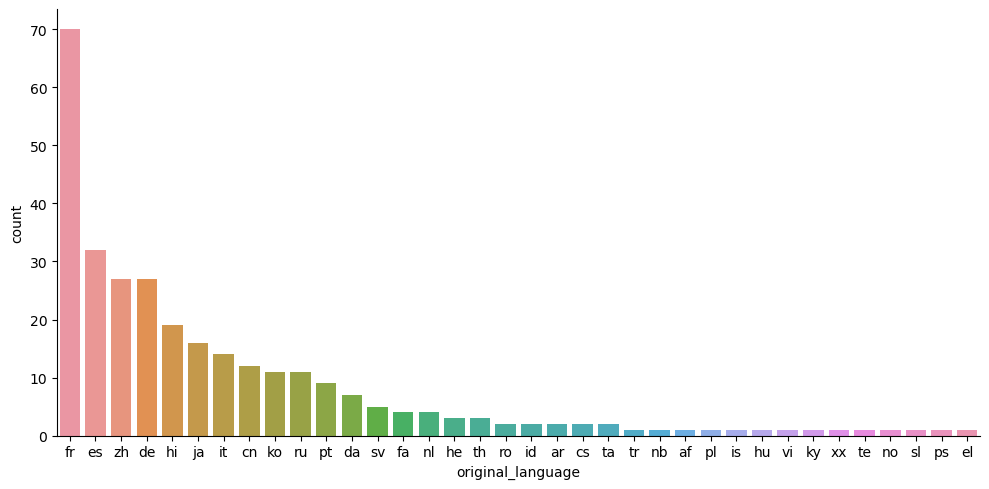

In [77]:
sns.catplot(x = "original_language", kind = "count", data = filmes_diferentes_do_ingles, aspect = 2, order=total_diferentes_do_ingles.index)

## As cores nao estao legais, quero usar uma pallet especifica atraves do atributo palette
#### Temos diversos outros atributos, consultar a documentacao do seaborn catplot

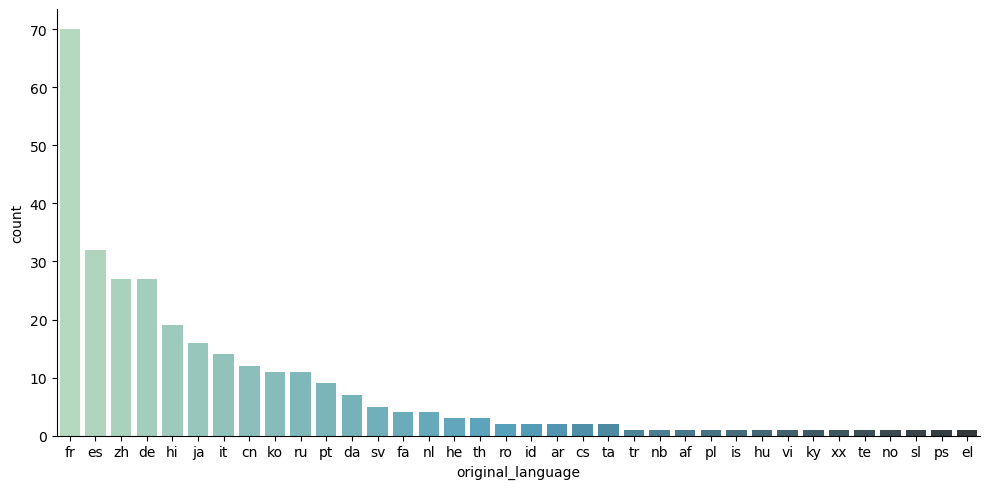

In [81]:
sns.catplot(x = "original_language", kind = "count", data = filmes_diferentes_do_ingles, 
            aspect = 2, order = total_diferentes_do_ingles.index, palette = "GnBu_d")